
# Домашнее задание к лекции "Базовые понятия статистики"

Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. Цель – максимально корректно заполнить пропуски.

In [1]:
import pandas as pd
import numpy as np

### Задание 1. Загрузка данных

Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names), загрузить его и оставить 8 столбцов для дальнейшего изучения: `surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome`.

In [2]:
#читаем файл и даём названия колонок
my_col_names = ['surgery?', 'Age', 'Hospital Number', 'rectal temperature', 'pulse', 'respiratory rate', 
                'temperature of extremities', 'peripheral pulse', 'mucous membranes', 'capillary refill time',
                'pain', 'peristalsis', 'abdominal distension', 'nasogastric tube', 'nasogastric reflux', 
                'nasogastric reflux PH', 'rectal examination', 'abdomen', 'packed cell volume', 'total protein', 
                'abdominocentesis appearance', 'abdomcentesis total protein', 'outcome', 'surgical lesion?', 
                'type of lesion 25', 'type of lesion 26', 'type of lesion 27', 'cp_data']
df_horse = pd.read_csv('horse_data.csv', names=my_col_names)
df_horse.head()

,surgery?,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,type of lesion 25,type of lesion 26,type of lesion 27,cp_data
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2


In [3]:
#удаляем ненужные колонки
df_horse = df_horse.drop(['Hospital Number', 'peripheral pulse', 'mucous membranes', 'capillary refill time', 
               'peristalsis', 'abdominal distension', 'nasogastric tube', 'nasogastric reflux', 
                'nasogastric reflux PH', 'rectal examination', 'abdomen', 'packed cell volume', 'total protein', 
                'abdominocentesis appearance', 'abdomcentesis total protein', 'surgical lesion?', 
                'type of lesion 25', 'type of lesion 26', 'type of lesion 27', 'cp_data'], axis = 1)
df_horse.head()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2,1,38.50,66,28,3,5,2
1,1,1,39.2,88,20,?,3,3
2,2,1,38.30,40,24,1,3,1
3,1,9,39.10,164,84,4,2,2
4,2,1,37.30,104,35,?,?,2


### Задание 2. Первичное изучение данных

Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

### Задание 3. Работа с пропусками

Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

#### Примечания
* Пропуски в данных обозначены знаком "?". 
* В колонке возраст 'Age', была допущена ошибка: вместо 2 (юный, моложе 6 мес.) проставлено 9. Для соответсвия описанию 9 было заменено на 2. Пропусков в данной колонке нет.
* **Пропуски** 
    * surgery? - 1
    * Age - 0
    * rectal temperature - 60
    * pulse - 24
    * respiratory rate - 58
    * temperature of extremities - 56
    * pain - 55
    * outcome - 1

* Колонки с указанием ректальной температуры, пульса и частоты дыхания (rectal temperature, pulse, respiratory rate) были приведены к числовому типу данных, поскольку содержат числовые показатели. Пропуски в данных колонках были заменены на медианное значение, как наиболее устойчивое к возможным выбросам.
* Для данных по ректальной температуре, пульсу и частоте дыхания (rectal temperature, pulse, respiratory rate) были рассчитаны базовые статистики посредством метода describe(), построения boxplot и определения выбросов **(выделено в конце ноутбука)**.
* Оставшиеся колонки surgery?, Age, temperature of extremities, pain, outcome можно отнести к категориальным, поэтому  пропуски были заменены на моду.

#### Анализ данных

In [4]:
df_horse.info()
#На первый взгляд пропусков нет. Посмотрим на значения по колонкам ниже
#температура, пульс и частота дыхания - переведём в числовой тип

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   surgery?                    300 non-null    object
 1   Age                         300 non-null    int64 
 2   rectal temperature          300 non-null    object
 3   pulse                       300 non-null    object
 4   respiratory rate            300 non-null    object
 5   temperature of extremities  300 non-null    object
 6   pain                        300 non-null    object
 7   outcome                     300 non-null    object
dtypes: int64(1), object(7)
memory usage: 18.9+ KB


In [5]:
#заменяем ? на nan и смотрим все пропуски
df_horse = df_horse.replace('?', np.nan)
df_horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   surgery?                    299 non-null    object
 1   Age                         300 non-null    int64 
 2   rectal temperature          240 non-null    object
 3   pulse                       276 non-null    object
 4   respiratory rate            242 non-null    object
 5   temperature of extremities  244 non-null    object
 6   pain                        245 non-null    object
 7   outcome                     299 non-null    object
dtypes: int64(1), object(7)
memory usage: 18.9+ KB


In [6]:
df_horse.isnull().sum() #количество пропусков по столбцам

surgery?                       1
Age                            0
rectal temperature            60
pulse                         24
respiratory rate              58
temperature of extremities    56
pain                          55
outcome                        1
dtype: int64

In [7]:
df_horse[df_horse.isnull().any(1)] #смотрим все строки, где есть хотя бы 1 пропуск

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
1,1,1,39.2,88,20,NaN,3,3
4,2,1,37.30,104,35,NaN,NaN,2
5,2,1,NaN,NaN,NaN,2,2,1
7,1,1,NaN,60,NaN,3,NaN,2
8,2,1,NaN,80,36,3,4,3
...,...,...,...,...,...,...,...,...
288,1,1,NaN,NaN,NaN,NaN,NaN,1
289,1,1,38.00,50,36,NaN,3,1
293,1,1,NaN,78,24,3,NaN,3
295,1,1,NaN,120,70,4,2,3


In [8]:
#смотрим уникальные значения по колонкам
#Была ли операция. 1 - да, 2 - нет, знак ? - скорее всего информация отсутствует
df_horse['surgery?'].unique()

array(['2', '1', nan], dtype=object)

In [9]:
df_horse['surgery?'].mode() #смотрим моду

0    1
dtype: object

In [10]:
#df_horse['surgery?'] = df_horse['surgery?'].fillna(df_horse['surgery?'].mode()) не работает, поэтому подставила вручную значение моды
#меняем пропуски на моду
df_horse['surgery?'] = df_horse['surgery?'].fillna('1')

In [11]:
df_horse['surgery?'].unique() #проверка уникальных значений после замены

array(['2', '1'], dtype=object)

In [12]:
#Age 1 = Adult horse, 2 = Young (< 6 months) Пропусков нет. В данных вместо 2 идёт 9
df_horse['Age'].unique() 

array([1, 9])

In [13]:
# Заменим 9 на 2, для соответсвия описанию
df_horse.loc[(df_horse['Age'] == 9), 'Age'] = 2

In [14]:
df_horse['Age'].unique()  #проверяем

array([1, 2])

In [15]:
df_horse.groupby('Age').count()

,surgery?,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
Age,,,,,,,
1,276,220,254,222,228,228,275
2,24,20,22,20,16,17,24


In [16]:
df_horse['Age'].mode() #смотрим моду

0    1
dtype: int64

In [17]:
# Ректальная температура, числовые значения - показатель температуры, 
# знак ? - скорее всего информация отсутствует - заменим на медиану
df_horse['rectal temperature'].unique()

array(['38.50', '39.2', '38.30', '39.10', '37.30', nan, '37.90', '38.10',
       '37.20', '38.00', '38.2', '37.60', '37.50', '39.4', '39.90',
       '38.40', '38.60', '38.3', '38.1', '37.80', '37.7', '37.70',
       '38.20', '37.8', '39.20', '39.00', '35.4', '38.90', '37.40',
       '40.30', '37.9', '37.00', '39.7', '37.6', '38.7', '36.40', '37.3',
       '38.0', '38.80', '39.60', '36.80', '38.4', '39.50', '36.5',
       '39.40', '38.70', '37.4', '38', '36.00', '37.1', '38.9', '39.30',
       '38.8', '39.5', '37.5', '38.5', '37.10', '36.10', '39.3', '36.60',
       '40.80', '36.90', '38.6', '40.00', '36.50', '37.2'], dtype=object)

In [18]:
#Меняем пропуски на медиану
df_horse['rectal temperature'] = df_horse['rectal temperature'].fillna(df_horse['rectal temperature'].median())

In [19]:
df_horse['rectal temperature'].unique() #проверяем уникальные знаечния после замены

array(['38.50', '39.2', '38.30', '39.10', '37.30', 38.2, '37.90', '38.10',
       '37.20', '38.00', '38.2', '37.60', '37.50', '39.4', '39.90',
       '38.40', '38.60', '38.3', '38.1', '37.80', '37.7', '37.70',
       '38.20', '37.8', '39.20', '39.00', '35.4', '38.90', '37.40',
       '40.30', '37.9', '37.00', '39.7', '37.6', '38.7', '36.40', '37.3',
       '38.0', '38.80', '39.60', '36.80', '38.4', '39.50', '36.5',
       '39.40', '38.70', '37.4', '38', '36.00', '37.1', '38.9', '39.30',
       '38.8', '39.5', '37.5', '38.5', '37.10', '36.10', '39.3', '36.60',
       '40.80', '36.90', '38.6', '40.00', '36.50', '37.2'], dtype=object)

In [20]:
# приводим к числовому типу
df_horse['rectal temperature'] = df_horse['rectal temperature'].astype(float)

In [21]:
# Пульс, числовые значения - показатель пульса, 
# знак ? - скорее всего информация отсутствует - заменим на медиану
df_horse['pulse'].unique()

array(['66', '88', '40', '164', '104', nan, '48', '60', '80', '90', '72',
       '42', '92', '76', '96', '128', '64', '110', '130', '108', '100',
       '112', '52', '146', '150', '120', '140', '84', '46', '114', '160',
       '54', '56', '38', '98', '50', '44', '70', '78', '49', '30', '136',
       '132', '65', '86', '129', '68', '36', '45', '124', '184', '75',
       '82'], dtype=object)

In [22]:
#Меняем пропуски на медиану
df_horse['pulse'] = df_horse['pulse'].fillna(df_horse['pulse'].median())

In [23]:
# приводим к числовому типу
df_horse['pulse'] = df_horse['pulse'].astype(float)

In [24]:
# Частота дыхания, числовые значения - показатели частоты дыхания, 
# знак ? - скорее всего информация отсутствует - заменим на медиану
df_horse['respiratory rate'].unique()

array(['28', '20', '24', '84', '35', nan, '16', '36', '12', '52', '48',
       '21', '60', '34', '42', '30', '96', '72', '15', '44', '32', '22',
       '18', '80', '40', '10', '51', '68', '66', '9', '14', '90', '8',
       '23', '58', '13', '70', '26', '88', '25', '50'], dtype=object)

In [25]:
#Меняем пропуски на медиану
df_horse['respiratory rate'] = df_horse['respiratory rate'].fillna(df_horse['respiratory rate'].median())

In [26]:
# приводим к числовому типу
df_horse['respiratory rate'] = df_horse['respiratory rate'].astype(float)

In [27]:
# Температура конечностей, 1 = Normal, 2 = Warm, 3 = Cool, 4 = Cold, 
# знак ? - скорее всего информация отсутствует
df_horse['temperature of extremities'].unique()

array(['3', nan, '1', '4', '2'], dtype=object)

In [28]:
df_horse['temperature of extremities'].mode() #смотрим моду

0    3
dtype: object

In [29]:
#меняем пропуски на моду
df_horse['temperature of extremities'] = df_horse['temperature of extremities'].fillna('3')

In [30]:
# Боль, 1 = alert, no pain, 2 = depressed, 3 = intermittent mild pain, 4 = intermittent severe pain
# 5 = continuous severe pain, знак ? - скорее всего информация отсутствует
df_horse['pain'].unique()

array(['5', '3', '2', nan, '4', '1'], dtype=object)

In [31]:
df_horse['pain'].mode() #смотрим моду

0    3
dtype: object

In [32]:
#меняем пропуски на моду
df_horse['pain'] = df_horse['pain'].fillna('3')

In [33]:
# Исход, 1 = lived, 2 = died, 3 = was euthanized
# знак ? - скорее всего информация отсутствует
df_horse['outcome'].unique()

array(['2', '3', '1', nan], dtype=object)

In [34]:
df_horse['outcome'].mode() #смотрим моду

0    1
dtype: object

In [35]:
#меняем пропуски на моду
df_horse['outcome'] = df_horse['outcome'].fillna('1')

### *Базовые статистики для числовых данных*

In [36]:
df_horse.info() #смотрим обновлённый df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    300 non-null    object 
 1   Age                         300 non-null    int64  
 2   rectal temperature          300 non-null    float64
 3   pulse                       300 non-null    float64
 4   respiratory rate            300 non-null    float64
 5   temperature of extremities  300 non-null    object 
 6   pain                        300 non-null    object 
 7   outcome                     300 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 18.9+ KB


In [37]:
df_horse.mode() #мода

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,1,1,38.2,64.0,24.5,3,3,1


In [38]:
df_horse.describe() #смотрим основные характеристики

,Age,rectal temperature,pulse,respiratory rate
count,300.000000,300.000000,300.000000,300.000000
mean,1.080000,38.174333,71.280000,29.273333
std,0.271746,0.654831,27.541545,16.010979
min,1.000000,35.400000,30.000000,8.000000
25%,1.000000,37.900000,48.000000,20.000000
50%,1.000000,38.200000,64.000000,24.500000
75%,1.000000,38.500000,88.000000,34.250000
max,2.000000,40.800000,184.000000,96.000000


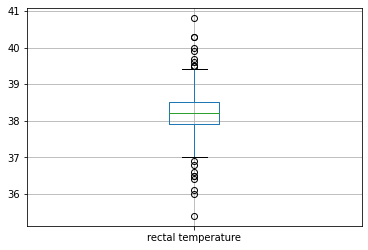

In [39]:
df_horse.boxplot(column='rectal temperature')

In [40]:
#Выбросы rectal temperature
q1 = df_horse['rectal temperature'].quantile(0.25)
q3 = df_horse['rectal temperature'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
show_outliers = df_horse[~df_horse['rectal temperature'].between(lower_bound, upper_bound, inclusive=True)]
show_outliers

<ipython-input-40-73abd63dcc94>:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  show_outliers = df_horse[~df_horse['rectal temperature'].between(lower_bound, upper_bound, inclusive=True)]


,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
20,1,1,39.9,72.0,60.0,1,5,1
44,1,1,35.4,140.0,24.0,3,4,3
54,2,1,40.3,114.0,36.0,3,2,3
75,1,2,39.7,100.0,24.5,3,2,3
80,1,1,36.4,98.0,35.0,3,4,2
91,2,1,40.3,114.0,36.0,3,2,2
99,2,1,39.6,108.0,51.0,3,2,1
113,1,1,36.8,60.0,28.0,3,3,2
117,2,1,39.5,64.0,24.5,3,3,3
118,1,1,36.5,78.0,30.0,1,5,1


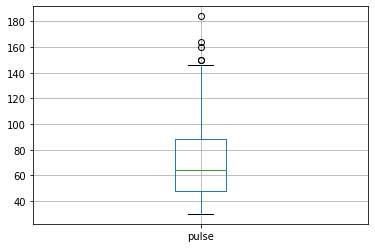

In [41]:
df_horse.boxplot(column='pulse')

In [42]:
#Выбросы pulse
q1 = df_horse['pulse'].quantile(0.25)
q3 = df_horse['pulse'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
show_outliers = df_horse[~df_horse['pulse'].between(lower_bound, upper_bound, inclusive=True)]
show_outliers

<ipython-input-42-8fc06f533a1e>:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  show_outliers = df_horse[~df_horse['pulse'].between(lower_bound, upper_bound, inclusive=True)]


,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
3,1,2,39.1,164.0,84.0,4,2,2
41,2,2,39.0,150.0,72.0,3,3,1
55,1,2,38.6,160.0,20.0,3,3,2
255,1,2,38.8,184.0,84.0,1,4,2
275,1,2,38.8,150.0,50.0,1,5,2


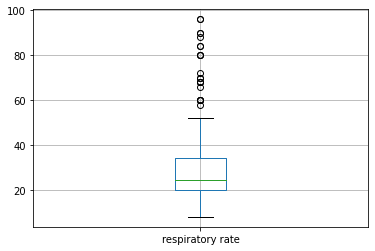

In [43]:
df_horse.boxplot(column='respiratory rate')

In [44]:
#Выбросы respiratory rate
q1 = df_horse['respiratory rate'].quantile(0.25)
q3 = df_horse['respiratory rate'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
show_outliers = df_horse[~df_horse['respiratory rate'].between(lower_bound, upper_bound, inclusive=True)]
show_outliers

<ipython-input-44-dc04c3da90f3>:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  show_outliers = df_horse[~df_horse['respiratory rate'].between(lower_bound, upper_bound, inclusive=True)]


,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
3,1,2,39.1,164.0,84.0,4,2,2
20,1,1,39.9,72.0,60.0,1,5,1
23,1,2,38.3,130.0,60.0,3,2,1
39,1,2,39.2,146.0,96.0,3,3,2
41,2,2,39.0,150.0,72.0,3,3,1
82,1,2,38.1,100.0,80.0,3,3,1
84,1,1,37.8,60.0,80.0,1,2,1
103,1,2,38.0,140.0,68.0,1,3,1
106,1,1,38.3,52.0,96.0,3,3,1
120,1,1,39.4,54.0,66.0,1,2,1
